In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [189]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [119]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [120]:
def remove_outliers(df, col, threshold = 2):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 2)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [121]:
df.reset_index(drop=True,inplace=True)

In [122]:
df.drop(all_indices,axis=0,inplace= True)

In [190]:
df['sqft_lot'].describe()

count     17206.000000
mean       9860.708648
std       11532.272734
min         520.000000
25%        5000.000000
50%        7344.000000
75%        9886.000000
max      137214.000000
Name: sqft_lot, dtype: float64

In [191]:
df = df.loc[df['condition']>=3]

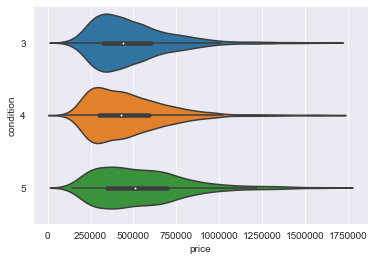

In [192]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

In [193]:
df['condition'].value_counts()

3    11175
4     4545
5     1330
Name: condition, dtype: int64

In [194]:
df['cond3'] = df.condition.apply(lambda x: 1 if x ==3 else 0)
df['cond4'] = df.condition.apply(lambda x: 1 if x ==4 else 0)
df['cond5'] = df.condition.apply(lambda x: 1 if x ==5 else 0)

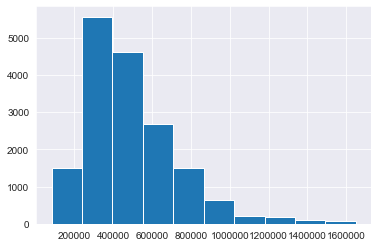

In [195]:
df['price'].hist()

In [196]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

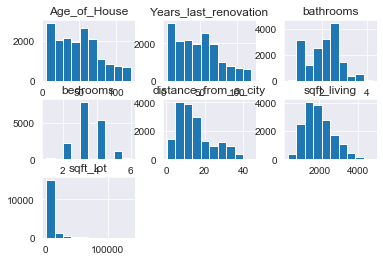

In [197]:
df[features].hist();

In [198]:
df.shape

(17050, 22)

In [199]:
tobox =['sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

In [200]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])


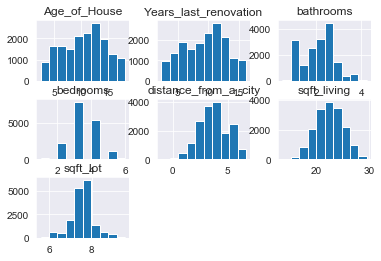

In [201]:
df[features].hist();

In [202]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [203]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House','grade',
           'Years_last_renovation']


In [204]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [205]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [206]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'cond3',
       'cond4', 'cond5'],
      dtype='object')

In [207]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [208]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'basement','grade']
outcome = ['price']

In [209]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'basement', 'cond3','grade','biggerliving','biggerlot',
 'cond4', 'cond5']
outcome = ['price']

In [210]:
X = df[x_cols]
y = df['price']

In [211]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     3715.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:23:30   Log-Likelihood:            -2.2422e+05
No. Observations:               17050   AIC:                         4.485e+05
Df Residuals:                   17037   BIC:                         4.486e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.597e+04   1275.638    -12.521      0.000   -1.85e+04   -1.35e+04
bathrooms             1.795e+04   1652.303     10.866      0.000    1.47e+04    2.12e+04
sqft_living            1.05e+05   2189.594     47.936      0.000    1.01e+05    1.09e+05
sqft_lot              1.704e+04   1288.903     13.223      0.000    1.45e+04    1.96e+04
distance_from_a_city -1.196e+05   1183.198   -101.094      0.000   -1.22e+05   -1.17e+05
Age_of_House          2.754e+04   1511.975     18.217      0.000    2.46e+04    3.05e+04
basement             -2.953e+04   2193.209    -13.463      0.000   -3.38e+04   -2.52e+04
cond3                 5.064e+05   1899.110    266.657      0.000    5.03e+05     5.1e+05
grade                 7.797e+04   1571.304     49.623      0.000    7.49e+04    8.11e+04
biggerliving         -2.782e+04   2364.021    -11.768      0.000   -3.25e+04   -2.32e+04
biggerlot            -7201.9808   2065.824     -3.486      0.000   -1.13e+04   -3152.752
cond4                 5.231e+05   2453.761    213.201      0.000    5.18e+05    5.28e+05
cond5                 5.585e+05   3864.922    144.503      0.000    5.51e+05    5.66e+05
==============================================================================
Omnibus:                     3508.301   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12694.345
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                       6.716   Cond. No.                         8.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 13
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.597e+04,1275.638,-12.521,0.0,-1.85e+04,-1.35e+04
bathrooms,1.795e+04,1652.303,10.866,0.0,1.47e+04,2.12e+04
sqft_living,1.05e+05,2189.594,47.936,0.0,1.01e+05,1.09e+05
sqft_lot,1.704e+04,1288.903,13.223,0.0,1.45e+04,1.96e+04
distance_from_a_city,-1.196e+05,1183.198,-101.094,0.0,-1.22e+05,-1.17e+05


In [213]:
X = df[x_cols]
y= df['price']

In [214]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     3715.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:23:32   Log-Likelihood:            -2.2422e+05
No. Observations:               17050   AIC:                         4.485e+05
Df Residuals:                   17037   BIC:                         4.486e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.597e+04   1275.638    -12.521      0.000   -1.85e+04   -1.35e+04
bathrooms             1.795e+04   1652.303     10.866      0.000    1.47e+04    2.12e+04
sqft_living            1.05e+05   2189.594     47.936      0.000    1.01e+05    1.09e+05
sqft_lot              1.704e+04   1288.903     13.223      0.000    1.45e+04    1.96e+04
distance_from_a_city -1.196e+05   1183.198   -101.094      0.000   -1.22e+05   -1.17e+05
Age_of_House          2.754e+04   1511.975     18.217      0.000    2.46e+04    3.05e+04
basement             -2.953e+04   2193.209    -13.463      0.000   -3.38e+04   -2.52e+04
cond3                 5.064e+05   1899.110    266.657      0.000    5.03e+05     5.1e+05
grade                 7.797e+04   1571.304     49.623      0.000    7.49e+04    8.11e+04
biggerliving         -2.782e+04   2364.021    -11.768      0.000   -3.25e+04   -2.32e+04
biggerlot            -7201.9808   2065.824     -3.486      0.000   -1.13e+04   -3152.752
cond4                 5.231e+05   2453.761    213.201      0.000    5.18e+05    5.28e+05
cond5                 5.585e+05   3864.922    144.503      0.000    5.51e+05    5.66e+05
==============================================================================
Omnibus:                     3508.301   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12694.345
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                       6.716   Cond. No.                         8.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7897858564060347),
 ('bathrooms', 3.002793421883987),
 ('sqft_living', 5.273188413276982),
 ('sqft_lot', 1.827200949397721),
 ('distance_from_a_city', 1.5397886960545968),
 ('Age_of_House', 2.51440445596547),
 ('basement', 1.2389907877382962),
 ('cond3', 2.600128632142472),
 ('grade', 2.715605647367542),
 ('biggerliving', 1.5143991432379638),
 ('biggerlot', 1.1125165625653306),
 ('cond4', 1.765410449683762),
 ('cond5', 1.2816816765979238)]

In [216]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

13 13


In [217]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     3715.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:23:37   Log-Likelihood:            -2.2422e+05
No. Observations:               17050   AIC:                         4.485e+05
Df Residuals:                   17037   BIC:                         4.486e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.597e+04   1275.638    -12.521      0.000   -1.85e+04   -1.35e+04
bathrooms             1.795e+04   1652.303     10.866      0.000    1.47e+04    2.12e+04
sqft_living            1.05e+05   2189.594     47.936      0.000    1.01e+05    1.09e+05
sqft_lot              1.704e+04   1288.903     13.223      0.000    1.45e+04    1.96e+04
distance_from_a_city -1.196e+05   1183.198   -101.094      0.000   -1.22e+05   -1.17e+05
Age_of_House          2.754e+04   1511.975     18.217      0.000    2.46e+04    3.05e+04
basement             -2.953e+04   2193.209    -13.463      0.000   -3.38e+04   -2.52e+04
cond3                 5.064e+05   1899.110    266.657      0.000    5.03e+05     5.1e+05
grade                 7.797e+04   1571.304     49.623      0.000    7.49e+04    8.11e+04
biggerliving         -2.782e+04   2364.021    -11.768      0.000   -3.25e+04   -2.32e+04
biggerlot            -7201.9808   2065.824     -3.486      0.000   -1.13e+04   -3152.752
cond4                 5.231e+05   2453.761    213.201      0.000    5.18e+05    5.28e+05
cond5                 5.585e+05   3864.922    144.503      0.000    5.51e+05    5.66e+05
==============================================================================
Omnibus:                     3508.301   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12694.345
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                       6.716   Cond. No.                         8.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     3715.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:23:39   Log-Likelihood:            -2.2422e+05
No. Observations:               17050   AIC:                         4.485e+05
Df Residuals:                   17037   BIC:                         4.486e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.597e+04   1275.638    -12.521      0.000   -1.85e+04   -1.35e+04
bathrooms             1.795e+04   1652.303     10.866      0.000    1.47e+04    2.12e+04
sqft_living            1.05e+05   2189.594     47.936      0.000    1.01e+05    1.09e+05
sqft_lot              1.704e+04   1288.903     13.223      0.000    1.45e+04    1.96e+04
distance_from_a_city -1.196e+05   1183.198   -101.094      0.000   -1.22e+05   -1.17e+05
Age_of_House          2.754e+04   1511.975     18.217      0.000    2.46e+04    3.05e+04
basement             -2.953e+04   2193.209    -13.463      0.000   -3.38e+04   -2.52e+04
cond3                 5.064e+05   1899.110    266.657      0.000    5.03e+05     5.1e+05
grade                 7.797e+04   1571.304     49.623      0.000    7.49e+04    8.11e+04
biggerliving         -2.782e+04   2364.021    -11.768      0.000   -3.25e+04   -2.32e+04
biggerlot            -7201.9808   2065.824     -3.486      0.000   -1.13e+04   -3152.752
cond4                 5.231e+05   2453.761    213.201      0.000    5.18e+05    5.28e+05
cond5                 5.585e+05   3864.922    144.503      0.000    5.51e+05    5.66e+05
==============================================================================
Omnibus:                     3508.301   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12694.345
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                       6.716   Cond. No.                         8.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

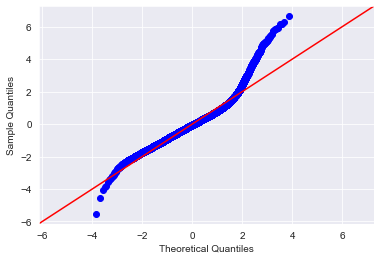

In [219]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


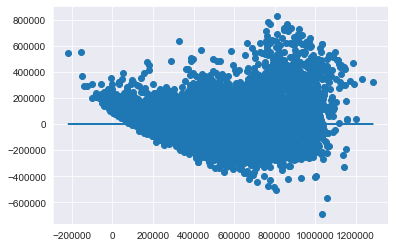

In [220]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

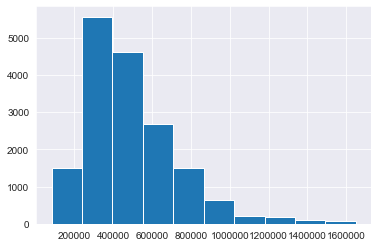

In [221]:
df.price.hist()

In [222]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 655000.0
0.81 percentile: 666345.0000000002
0.82 percentile: 679000.0
0.83 percentile: 690634.0
0.84 percentile: 703375.2
0.85 percentile: 718824.9999999998
0.86 percentile: 731811.6599999999
0.87 percentile: 749950.0
0.88 percentile: 760264.28
0.89 percentile: 780000.0
0.9 percentile: 799000.0
0.91 percentile: 818000.0
0.92 percentile: 840000.0
0.93 percentile: 863285.0000000007
0.94 percentile: 895000.0
0.95 percentile: 925000.0
0.96 percentile: 975000.0
0.97 percentile: 1040000.0
0.98 percentile: 1160000.0
0.99 percentile: 1320000.0


In [223]:
orig_tot = len(df)
df = df[df.price < 1000000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.03472140762463343


In [224]:
X = df[x_cols]
y = df['price']

In [225]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     3456.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:23:47   Log-Likelihood:            -2.1310e+05
No. Observations:               16458   AIC:                         4.262e+05
Df Residuals:                   16445   BIC:                         4.263e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.477e+04   1065.233    -13.863      0.000   -1.69e+04   -1.27e+04
bathrooms             1.041e+04   1386.952      7.504      0.000    7689.040    1.31e+04
sqft_living           9.699e+04   1829.119     53.026      0.000    9.34e+04    1.01e+05
sqft_lot              1.408e+04   1078.097     13.059      0.000     1.2e+04    1.62e+04
distance_from_a_city  -1.05e+05    999.726   -105.006      0.000   -1.07e+05   -1.03e+05
Age_of_House          1.935e+04   1284.977     15.058      0.000    1.68e+04    2.19e+04
basement              -2.75e+04   1824.009    -15.078      0.000   -3.11e+04   -2.39e+04
cond3                 4.907e+05   1580.086    310.578      0.000    4.88e+05    4.94e+05
grade                  6.33e+04   1335.021     47.417      0.000    6.07e+04    6.59e+04
biggerliving         -2.607e+04   1964.780    -13.266      0.000   -2.99e+04   -2.22e+04
biggerlot            -3501.6324   1718.094     -2.038      0.042   -6869.282    -133.983
cond4                 5.051e+05   2042.036    247.367      0.000    5.01e+05    5.09e+05
cond5                 5.348e+05   3253.337    164.386      0.000    5.28e+05    5.41e+05
==============================================================================
Omnibus:                      455.485   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.704
Skew:                           0.281   Prob(JB):                    3.81e-151
Kurtosis:                       3.833   Cond. No.                         7.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 13
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.477e+04,1065.233,-13.863,0.0,-1.69e+04,-1.27e+04
bathrooms,1.041e+04,1386.952,7.504,0.0,7689.040,1.31e+04
sqft_living,9.699e+04,1829.119,53.026,0.0,9.34e+04,1.01e+05
sqft_lot,1.408e+04,1078.097,13.059,0.0,1.2e+04,1.62e+04
distance_from_a_city,-1.05e+05,999.726,-105.006,0.0,-1.07e+05,-1.03e+05


In [227]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     3456.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:23:59   Log-Likelihood:            -2.1310e+05
No. Observations:               16458   AIC:                         4.262e+05
Df Residuals:                   16445   BIC:                         4.263e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.477e+04   1065.233    -13.863      0.000   -1.69e+04   -1.27e+04
bathrooms             1.041e+04   1386.952      7.504      0.000    7689.040    1.31e+04
sqft_living           9.699e+04   1829.119     53.026      0.000    9.34e+04    1.01e+05
sqft_lot              1.408e+04   1078.097     13.059      0.000     1.2e+04    1.62e+04
distance_from_a_city  -1.05e+05    999.726   -105.006      0.000   -1.07e+05   -1.03e+05
Age_of_House          1.935e+04   1284.977     15.058      0.000    1.68e+04    2.19e+04
basement              -2.75e+04   1824.009    -15.078      0.000   -3.11e+04   -2.39e+04
cond3                 4.907e+05   1580.086    310.578      0.000    4.88e+05    4.94e+05
grade                  6.33e+04   1335.021     47.417      0.000    6.07e+04    6.59e+04
biggerliving         -2.607e+04   1964.780    -13.266      0.000   -2.99e+04   -2.22e+04
biggerlot            -3501.6324   1718.094     -2.038      0.042   -6869.282    -133.983
cond4                 5.051e+05   2042.036    247.367      0.000    5.01e+05    5.09e+05
cond5                 5.348e+05   3253.337    164.386      0.000    5.28e+05    5.41e+05
==============================================================================
Omnibus:                      455.485   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.704
Skew:                           0.281   Prob(JB):                    3.81e-151
Kurtosis:                       3.833   Cond. No.                         7.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7833397588184388),
 ('bathrooms', 2.92913453204898),
 ('sqft_living', 5.042170246119735),
 ('sqft_lot', 1.8582489328738665),
 ('distance_from_a_city', 1.5398428073698434),
 ('Age_of_House', 2.5904179827117138),
 ('basement', 1.2308734982911638),
 ('cond3', 2.607890778617063),
 ('grade', 2.5667756318377917),
 ('biggerliving', 1.506306670799644),
 ('biggerlot', 1.113226128621554),
 ('cond4', 1.7805802421571255),
 ('cond5', 1.2724285423588944)]

In [229]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

13 13


In [230]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     3456.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:24:11   Log-Likelihood:            -2.1310e+05
No. Observations:               16458   AIC:                         4.262e+05
Df Residuals:                   16445   BIC:                         4.263e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.477e+04   1065.233    -13.863      0.000   -1.69e+04   -1.27e+04
bathrooms             1.041e+04   1386.952      7.504      0.000    7689.040    1.31e+04
sqft_living           9.699e+04   1829.119     53.026      0.000    9.34e+04    1.01e+05
sqft_lot              1.408e+04   1078.097     13.059      0.000     1.2e+04    1.62e+04
distance_from_a_city  -1.05e+05    999.726   -105.006      0.000   -1.07e+05   -1.03e+05
Age_of_House          1.935e+04   1284.977     15.058      0.000    1.68e+04    2.19e+04
basement              -2.75e+04   1824.009    -15.078      0.000   -3.11e+04   -2.39e+04
cond3                 4.907e+05   1580.086    310.578      0.000    4.88e+05    4.94e+05
grade                  6.33e+04   1335.021     47.417      0.000    6.07e+04    6.59e+04
biggerliving         -2.607e+04   1964.780    -13.266      0.000   -2.99e+04   -2.22e+04
biggerlot            -3501.6324   1718.094     -2.038      0.042   -6869.282    -133.983
cond4                 5.051e+05   2042.036    247.367      0.000    5.01e+05    5.09e+05
cond5                 5.348e+05   3253.337    164.386      0.000    5.28e+05    5.41e+05
==============================================================================
Omnibus:                      455.485   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.704
Skew:                           0.281   Prob(JB):                    3.81e-151
Kurtosis:                       3.833   Cond. No.                         7.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

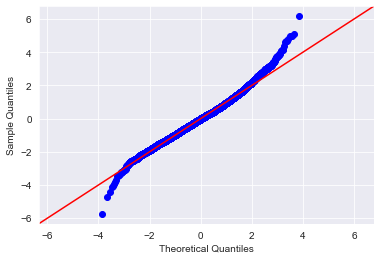

In [231]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


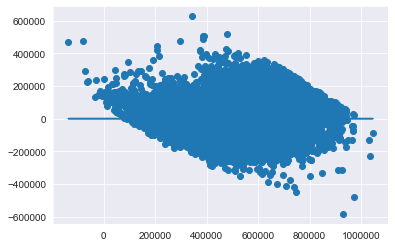

In [232]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 655000.0
0.81 percentile: 666345.0000000002
0.82 percentile: 679000.0
0.83 percentile: 690634.0
0.84 percentile: 703375.2
0.85 percentile: 718824.9999999998
0.86 percentile: 731811.6599999999
0.87 percentile: 749950.0
0.88 percentile: 760264.28
0.89 percentile: 780000.0
0.9 percentile: 799000.0
0.91 percentile: 818000.0
0.92 percentile: 840000.0
0.93 percentile: 863285.0000000007
0.94 percentile: 895000.0
0.95 percentile: 925000.0
0.96 percentile: 975000.0
0.97 percentile: 1040000.0
0.98 percentile: 1160000.0
0.99 percentile: 1320000.0


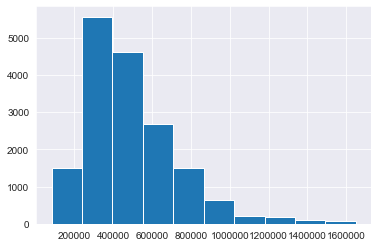

In [173]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [97]:
df = df[df.price <= 780000.0]


In [98]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2335.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:20:37   Log-Likelihood:            -1.9626e+05
No. Observations:               15203   AIC:                         3.925e+05
Df Residuals:                   15192   BIC:                         3.926e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              5488.8389    991.343      5.537      0.000    3545.687    7431.990
bathrooms             3.416e+04   1295.411     26.368      0.000    3.16e+04    3.67e+04
sqft_lot              2.878e+04    992.316     29.001      0.000    2.68e+04    3.07e+04
distance_from_a_city -9.257e+04   1018.357    -90.903      0.000   -9.46e+04   -9.06e+04
Age_of_House          1.147e+04   1325.550      8.650      0.000    8867.643    1.41e+04
basement             -5591.7801   1794.058     -3.117      0.002   -9108.349   -2075.211
cond3                 4.469e+05   1377.608    324.431      0.000    4.44e+05     4.5e+05
grade                 8.258e+04   1217.224     67.840      0.000    8.02e+04     8.5e+04
biggerliving          1.307e+04   1788.093      7.310      0.000    9565.270    1.66e+04
cond4                 4.592e+05   1904.146    241.140      0.000    4.55e+05    4.63e+05
cond5                 4.846e+05   3207.023    151.117      0.000    4.78e+05    4.91e+05
==============================================================================
Omnibus:                      231.613   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.394
Skew:                           0.268   Prob(JB):                     1.28e-56
Kurtosis:                       3.346   Cond. No.                         6.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

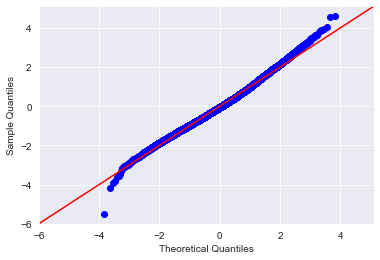

In [99]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


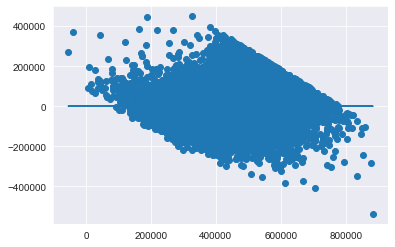

In [100]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [157]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [158]:
residuals = model.resid

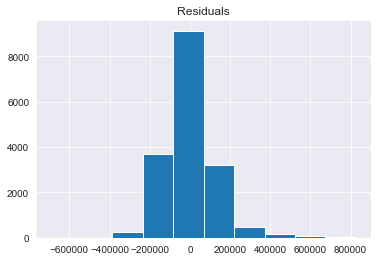

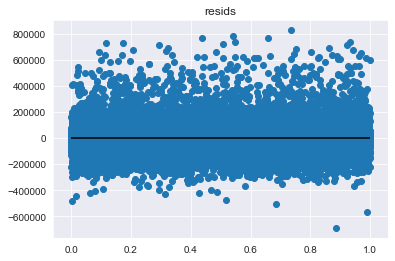

In [159]:
plot_residuals(residuals)

In [233]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [234]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [235]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.7135654416491605, 0.712350563886201, 0.712843871860071)

In [236]:
cv5mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) )
cv10mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) )
cv20mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mse_scores,cv10mse_scores,cv20mse_scores

(-10389019168.047596, -10389322780.99929, -10367441051.590332)

In [237]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-79193.83920855145, -79186.79709060321, -79102.21751534243)

In [238]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [239]:
make_ols_sklearn(X, y)

train R2 score = 0.7152870220381132
test R2 score = 0.7182159878434623
cv5 R2 score = 0.7135654416491605
cv10 R2 score = 0.712350563886201
cv5 MSE score = -10389019168.047594
cv10  MSE score = -10389322780.999289


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [240]:
make_ols_sklearn(X, y)

train R2 score = 0.7181297574123622
test R2 score = 0.7071319408002196
cv5 R2 score = 0.7135654416491605
cv10 R2 score = 0.712350563886201
cv5 MSE score = -10389019168.047594
cv10  MSE score = -10389322780.999289


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [241]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

In [242]:
resid['residuals']  = residuals

In [243]:
resid

,price,residuals
0,538000.0,21297.491048
1,180000.0,-32912.032453
2,604000.0,108215.134499
3,510000.0,3799.333396
5,257500.0,1536.702578
...,...,...
19216,475000.0,17361.972300
19217,360000.0,-96671.981360
19218,400000.0,-129046.139309
19219,402101.0,-50269.707381


In [244]:
import seaborn as sns

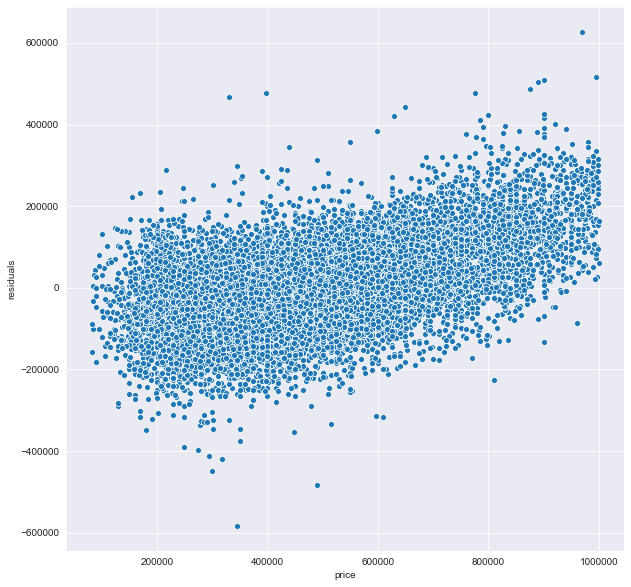

In [245]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)